# Energy Based Generative Model -- Maximum Entropy

In [1]:
%load_ext autoreload
%autoreload 2

## Features: Classifier on MNIST Dataset
example from [keras documentation](https://keras.io/examples/mnist_cnn/)

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Reshape
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# load mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten input (for maxent search)
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

# input shape for conv2d model
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

# Normalizing data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255.0
X_test /= 255.0

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Reshape(input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
/opt/bhartl/anaconda3/envs/cells/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/bhartl/anaconda3/envs/cells/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/bhartl/anaconda3/envs/cells/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/bhartl/anaconda3/envs

X_train shape: (60000, 784)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 3328/60000 [>.............................] - ETA: 49s - loss: 1.3786 - acc: 0.5568

KeyboardInterrupt: 

In [79]:
model.save('models/mnist_softmax.hdf5')

## Generative Model
- feature function: model softmax prediction
- learn weights

In [3]:
%cd ../..

/home/bhartl/projects/generative-models


In [47]:
from gempy.mnist import MnistGenerator
import matplotlib.pyplot as plt
import numpy as np


kwargs = dict(    
    maxsteps=1000, 
    batch_size=8, 
    n_sweeps=1, 
    learning_rate=5e-3, 
    save_fig=10, 
    # reg_l1=0.01, 
    reg_l2=0.001, 
)

In [ ]:
mnist_zero = MnistGenerator.main(train_on=0, export_path='dat/mnist_0', **kwargs)

*** train on 6903 `0`s in the mnist dataset ***
*** start fitting maxent model ***
step: 1094/1100, drawn samples: 8 (0.371), cost: -75.1291

*** train on 7877 `1`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.661), cost: -55.211
** dumped results to `dat/mnist_1/number_1.yml` ***
** done ***


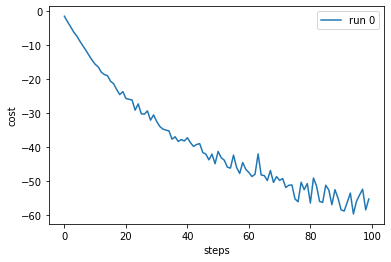

In [10]:
mnist_one = MnistGenerator.main(train_on=1, export_path='dat/mnist_1', **kwargs)

*** train on 6990 `2`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.706), cost: -46.564
** dumped results to `dat/mnist_2/number_2.yml` ***
** done ***


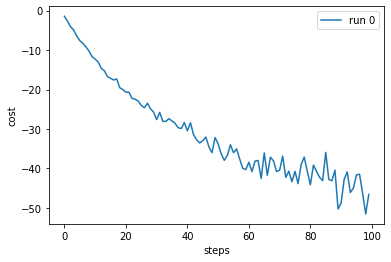

In [12]:
mnist_two = MnistGenerator.main(train_on=2, export_path='dat/mnist_2', **kwargs)

*** train on 7141 `3`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.704), cost: -49.875
** dumped results to `dat/mnist_3/number_3.yml` ***
** done ***


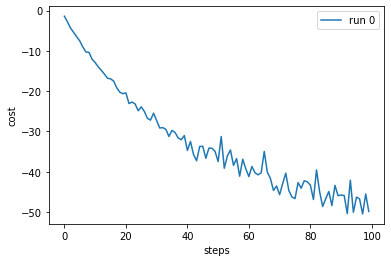

In [31]:
mnist_three = MnistGenerator.main(train_on=3, export_path='dat/mnist_3', **kwargs)

*** train on 6824 `4`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.712), cost: -44.718
** dumped results to `dat/mnist_4/number_4.yml` ***
** done ***


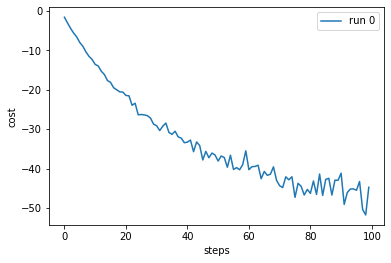

In [32]:
mnist_four = MnistGenerator.main(train_on=4, export_path='dat/mnist_4', **kwargs)

*** train on 6313 `5`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.705), cost: -40.680
** dumped results to `dat/mnist_5/number_5.yml` ***
** done ***


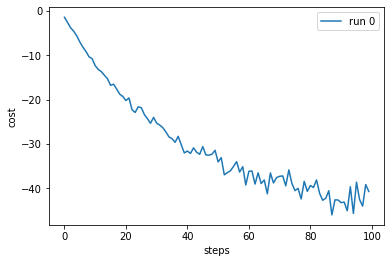

In [33]:
mnist_five = MnistGenerator.main(train_on=5, export_path='dat/mnist_5', **kwargs)

*** train on 6876 `6`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.717), cost: -49.132
** dumped results to `dat/mnist_6/number_6.yml` ***
** done ***


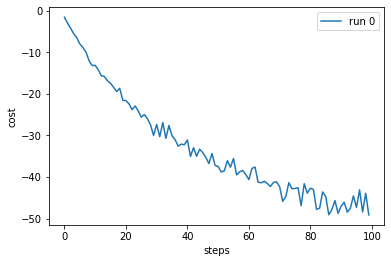

In [34]:
mnist_six = MnistGenerator.main(train_on=6, export_path='dat/mnist_6', **kwargs)

*** train on 7293 `7`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.707), cost: -51.539
** dumped results to `dat/mnist_7/number_7.yml` ***
** done ***


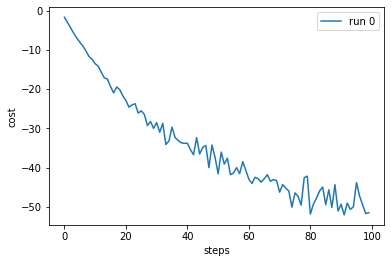

In [35]:
mnist_seven = MnistGenerator.main(train_on=7, export_path='dat/mnist_7', **kwargs)

*** train on 6825 `8`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.721), cost: -49.091
** dumped results to `dat/mnist_8/number_8.yml` ***
** done ***


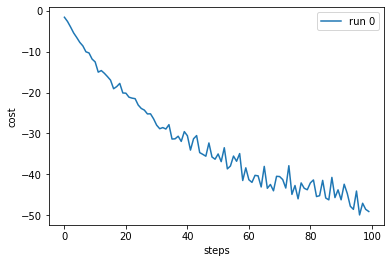

In [36]:
mnist_eight = MnistGenerator.main(train_on=8, export_path='dat/mnist_8', **kwargs)

*** train on 6958 `9`s in the mnist dataset ***
*** start fitting maxent model ***
step: 100/100, drawn samples: 10 (0.687), cost: -46.101
** dumped results to `dat/mnist_9/number_9.yml` ***
** done ***


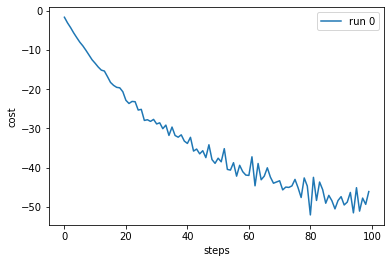

In [37]:
mnist_nine = MnistGenerator.main(train_on=9, export_path='dat/mnist_9', **kwargs)

In [41]:
def draw_number(n, n_sweeps=100, beta=10.):
    s = str(n)
    
    sampler = [
        mnist_zero, mnist_one, mnist_two, mnist_three, mnist_four, 
        mnist_five, mnist_six, mnist_seven, mnist_eight, mnist_nine, 
    ]
    
    numbers = []
    for si in s:
        i = int(si)
        assert 0 <= i <= 9
        print("sample ", i)
        mnist_i = sampler[i]
        sample_i = mnist_i.sample(n_samples=1, n_sweeps=n_sweeps, beta=beta)[0].reshape((28, 28))
        numbers.append(sample_i)
        print()
    
    return np.concatenate(numbers, axis=1)

In [ ]:
fantasy_number = draw_number(123456789)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

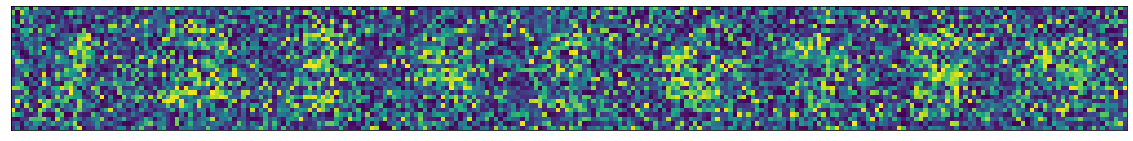

In [46]:
%matplotlib inline

plt.figure(figsize=(20, 5))
plt.imshow(fantasy_number, cmap='binary_r')
plt.xticks([])
plt.yticks([])
plt.plot